In [1]:
import numpy as np
import pandas as pd
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")
train=pd.read_csv("train_data.csv")


In [2]:
train["Avg_firing_dist"]=train["Avg_firing_dist"].replace(0.0,train['Avg_firing_dist'].mean())
train["Avg_Srv_time"]=train["Avg_Srv_time"].replace(0.0,train['Avg_Srv_time'].mean())
train["Avg_ping"]=train["Avg_ping"].replace(0.0,train['Avg_ping'].mean())
train["Total_travel_dist"]=train["Total_travel_dist"].replace(0.0,train['Total_travel_dist'].mean())



train["Avg_firing_dist_in"]=1/train["Avg_firing_dist"]
train["Avg_ping_in"]=1/train["Avg_ping"]
train.head(10)

,Avg_firing_dist,Avg_Srv_time,Avg_ping,Total_travel_dist,Avg_damage,Avg_firing_dist_in,Avg_ping_in
0,264.22,19.06,96.79,6332.00,1788.88,0.003785,0.010332
1,366.66,24.42,96.67,6603.70,1750.92,0.002727,0.010344
2,259.54,16.37,97.50,6145.80,1838.12,0.003853,0.010256
3,183.23,13.52,97.31,6584.70,1869.24,0.005458,0.010276
4,299.71,19.74,97.82,6701.55,1818.88,0.003337,0.010223
5,396.30,14.88,96.15,4000.70,1746.08,0.002523,0.010400
6,250.44,13.61,97.43,4458.60,1863.52,0.003993,0.010264
7,161.39,12.53,97.30,8117.05,1904.76,0.006196,0.010277
8,170.88,12.94,97.19,6687.30,1851.44,0.005852,0.010289
9,206.76,12.50,97.45,6300.65,1821.56,0.004837,0.010262


In [3]:
test=pd.read_csv("test_data.csv")
test["Avg_firing_dist"]=test["Avg_firing_dist"].replace(0.0,test['Avg_firing_dist'].mean())
test["Avg_Srv_time"]=test["Avg_Srv_time"].replace(0.0,test['Avg_Srv_time'].mean())
test["Avg_ping"]=test["Avg_ping"].replace(0.0,test['Avg_ping'].mean())
test["Total_travel_dist"]=test["Total_travel_dist"].replace(0.0,test['Total_travel_dist'].mean())



test["Avg_firing_dist_in"]=1/test["Avg_firing_dist"]
test["Avg_ping_in"]=1/test["Avg_ping"]
train.isnull().sum()

Avg_firing_dist       0
Avg_Srv_time          0
Avg_ping              0
Total_travel_dist     0
Avg_damage            0
Avg_firing_dist_in    0
Avg_ping_in           0
dtype: int64

In [4]:
train_original=train.copy()
test_original=test.copy()

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


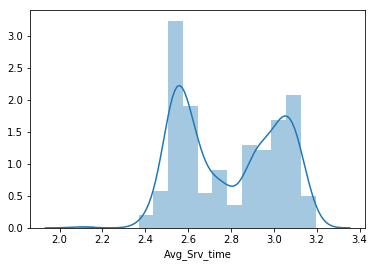

In [5]:
train['Avg_firing_dist'] = np.log(train['Avg_firing_dist'])
train['Avg_Srv_time'] = np.log(train['Avg_Srv_time'])
train['Avg_ping'] = np.log(train['Avg_ping'])
train['Total_travel_dist'] = np.log(train['Total_travel_dist'])

sns.distplot(train['Avg_Srv_time']);

In [6]:
test['Avg_firing_dist'] = np.log(test['Avg_firing_dist'])
test['Avg_Srv_time'] = np.log(test['Avg_Srv_time'])
test['Avg_ping'] = np.log(test['Avg_ping'])
test['Total_travel_dist'] = np.log(test['Total_travel_dist'])


In [7]:
X=train.drop('Avg_damage',1)
y=train.Avg_damage
X.shape

(2000, 6)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score



In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
test = scaler.transform(test)

In [13]:
model = RandomForestRegressor(n_jobs=-1)

In [14]:
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [15]:
y_pred = model.predict(x_cv)
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_cv, y_pred)))

72.86897020085661


In [16]:
pred_test1=[]
pred_test = model.predict(test)
submission=pd.read_csv("sample_submission.csv")
for xx in pred_test:
    pred_test1.append(int(xx+.50))


In [17]:
pd.DataFrame(pred_test1).to_csv('logistic.csv',index=False,header=False)